In [2]:
import numpy as np
from matplotlib import pyplot as plt
import os
import seaborn as sns

In [ ]:
load_tx = False
if load_tx:
    dataPath = '/data/LLMs/willet/regression_results/44-6v-8_20_tx/'
else:
    dataPath = '/data/LLMs/willet/regression_results/44-6v-8_20_pow/'

In [3]:
session = np.load('/data/LLMs/willet/session.npy')
r2 = []
label = []
for sess in np.unique(session):
    
    r2.append(np.mean(np.load(f'/data/LLMs/willet/regression_results/delay_go_out-of-sample/r2_{sess}.npy')))
    r2.append(np.mean(np.load(f'/data/LLMs/willet/regression_results/44-6v-8_20_pow/r2_{sess}.npy')))
    label.append('Delay-Go_BA6V')
    label.append('BA44_BA6v')
    

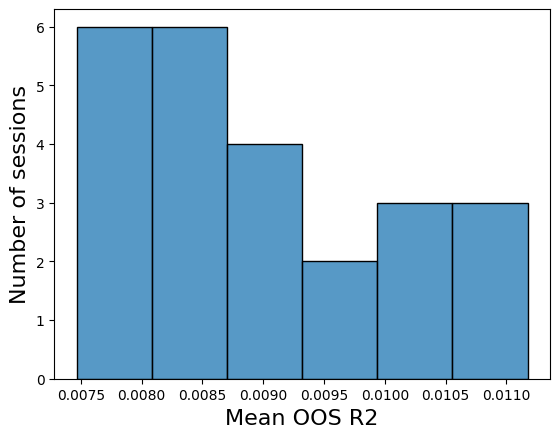

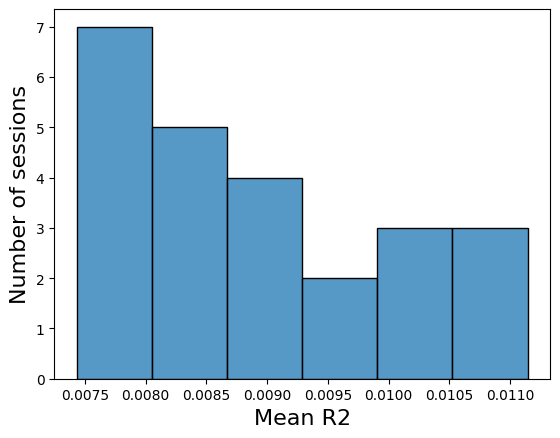

In [23]:
r2_oos_arr = []
r2_arr = []
r2_oos_dict = {}
for file in os.listdir(dataPath):
    
    if 'r2_oos' in file:
        r2_oos_dict[file.replace('r2_oos_', '').replace('.npy', '')] = np.load(f"{dataPath}{file}")
        r2_oos = np.mean(np.load(f"{dataPath}{file}"))
        r2_oos_arr.append(r2_oos)
        
    elif 'r2' in file:
        r2 = np.mean(np.load(f"{dataPath}{file}"))
        r2_arr.append(r2)
        
sns.histplot(r2_oos_arr)
plt.ylabel("Number of sessions", fontsize=16)
plt.xlabel("Mean OOS R2", fontsize=16)
plt.savefig("/home2/ebrahim/neural_seq_decoder/figures/r2_oos_44_6v")
plt.show()
sns.histplot(r2_arr)
plt.ylabel("Number of sessions", fontsize=16)
plt.xlabel("Mean R2", fontsize=16)
plt.savefig("/home2/ebrahim/neural_seq_decoder/figures/r2_44_6v")

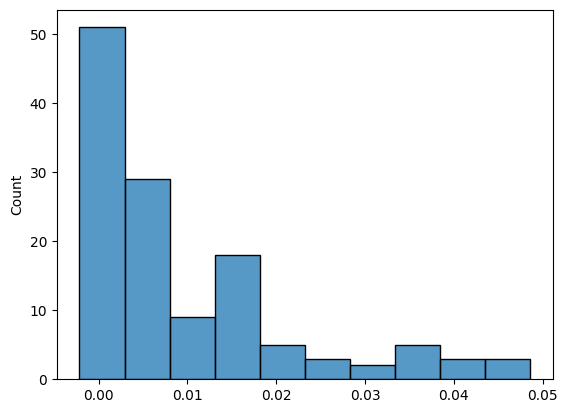

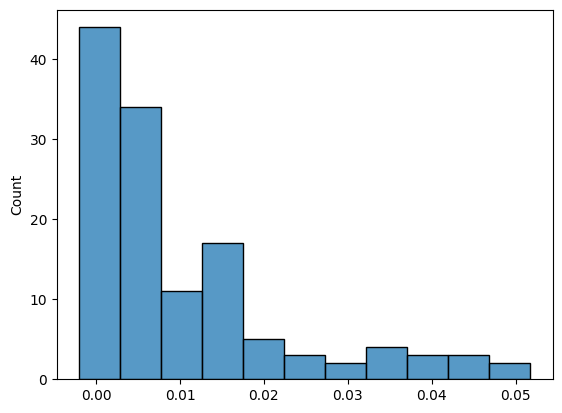

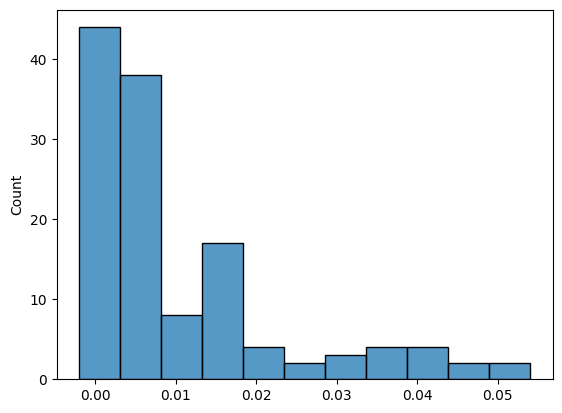

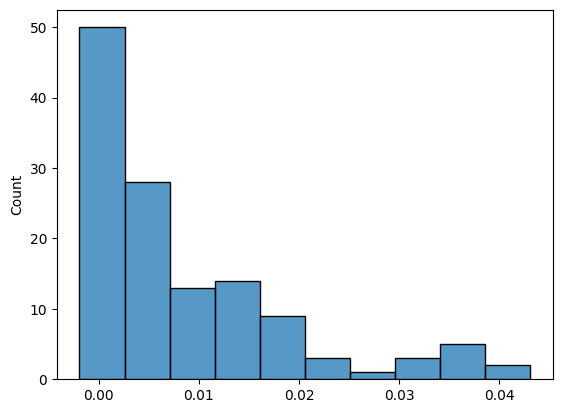

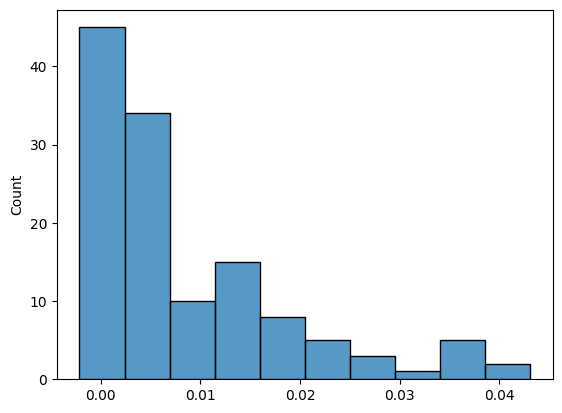

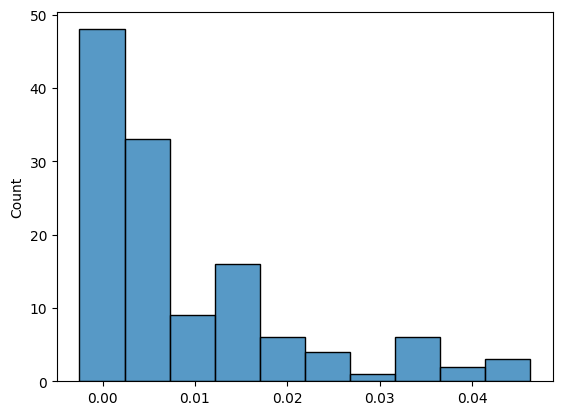

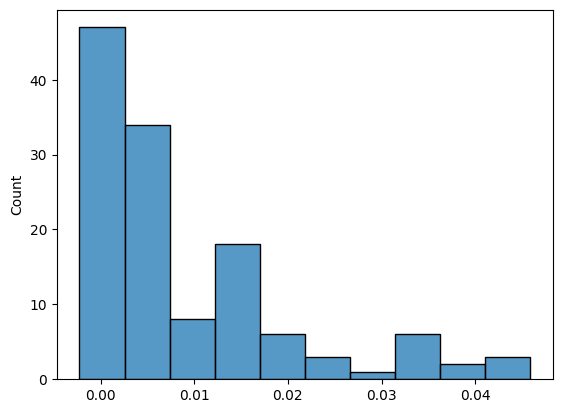

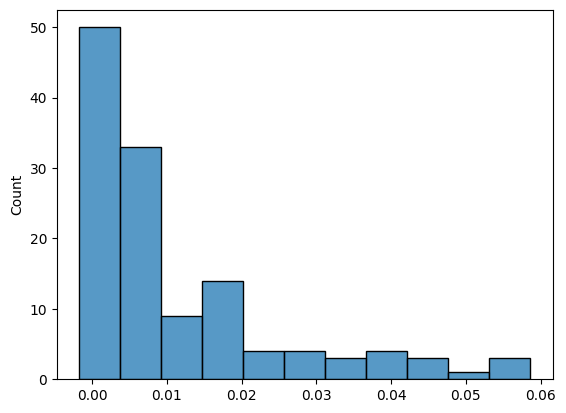

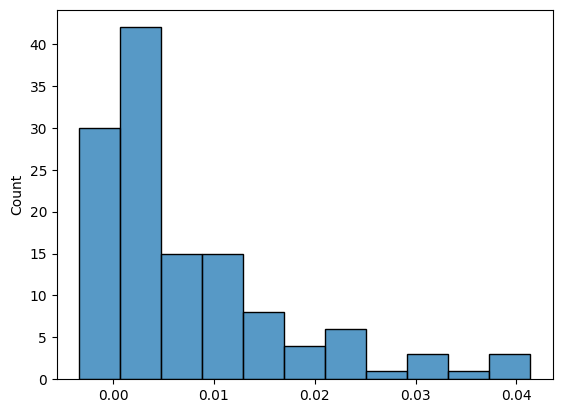

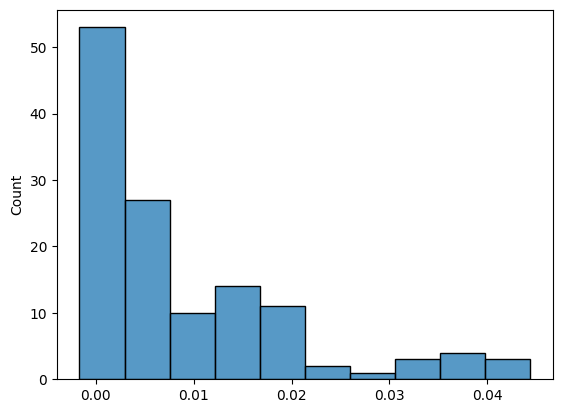

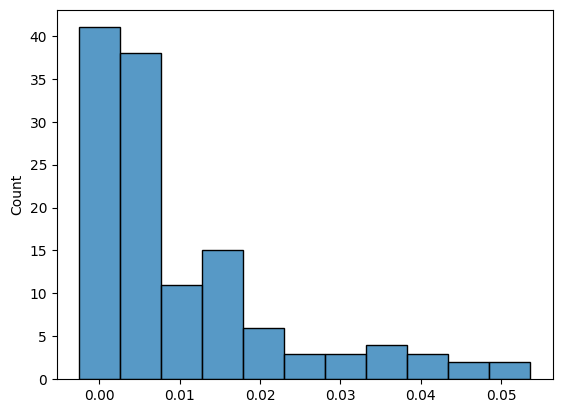

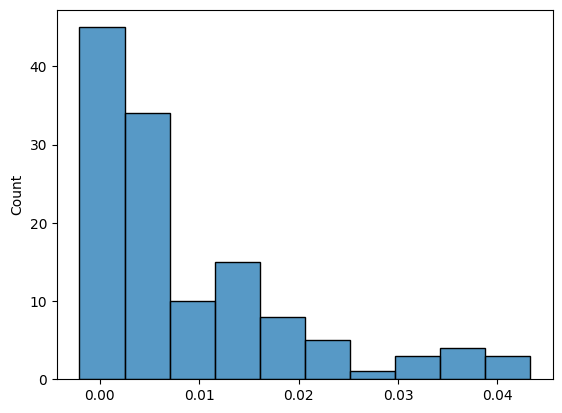

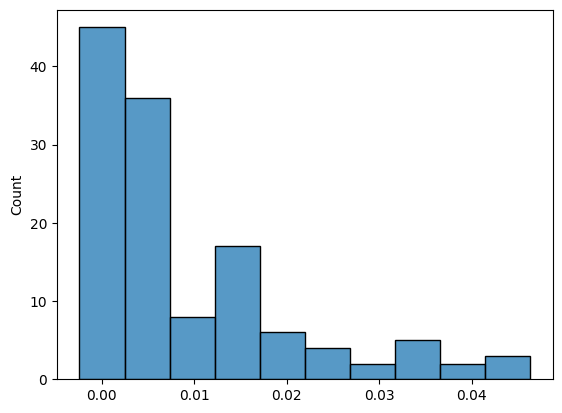

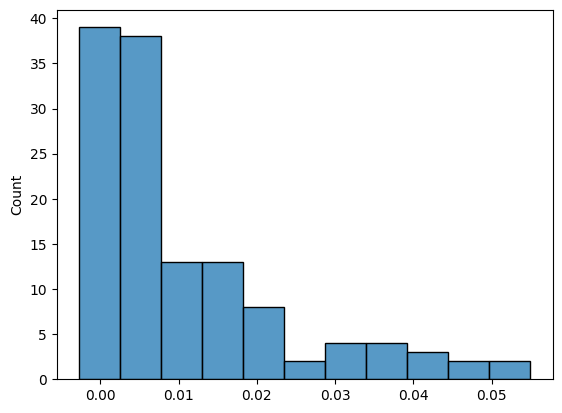

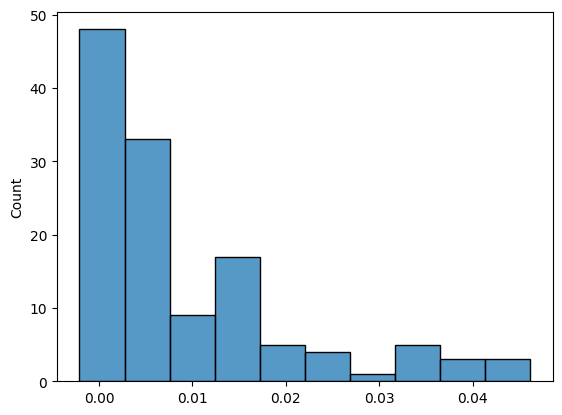

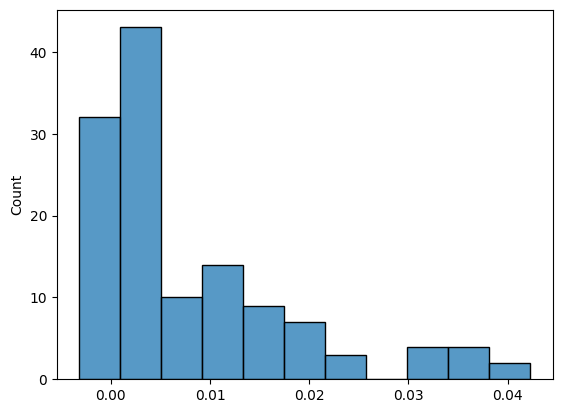

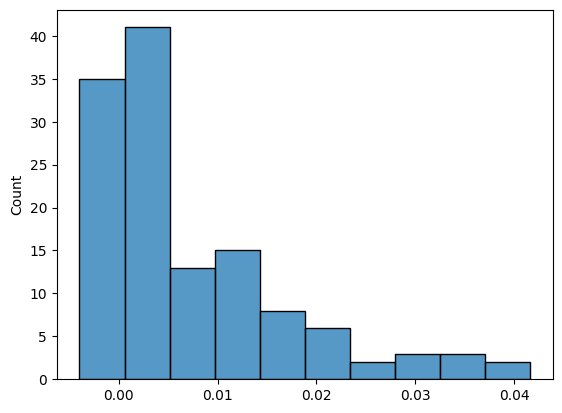

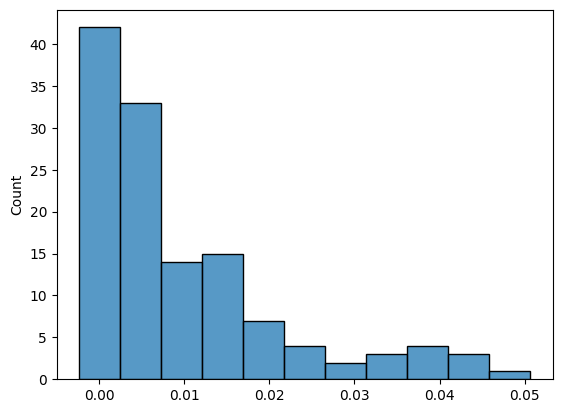

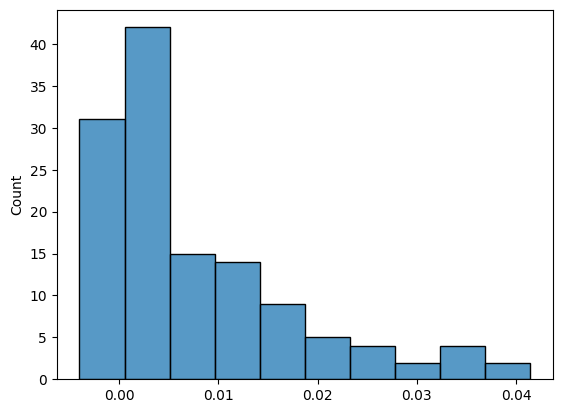

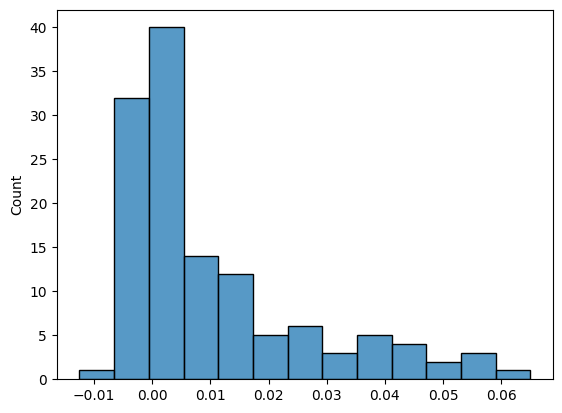

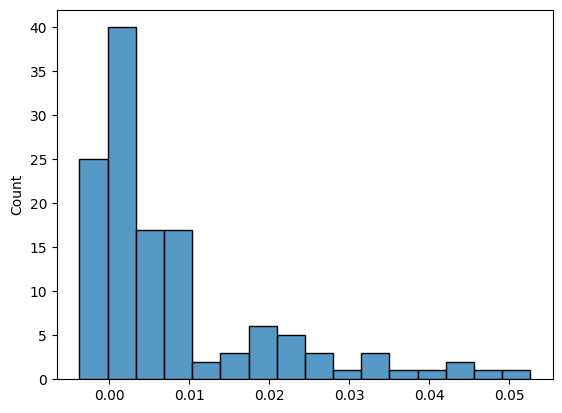

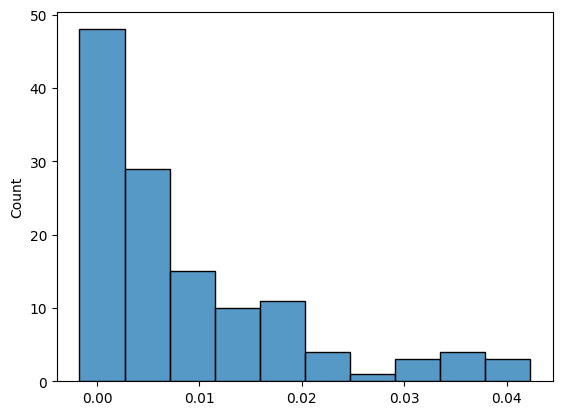

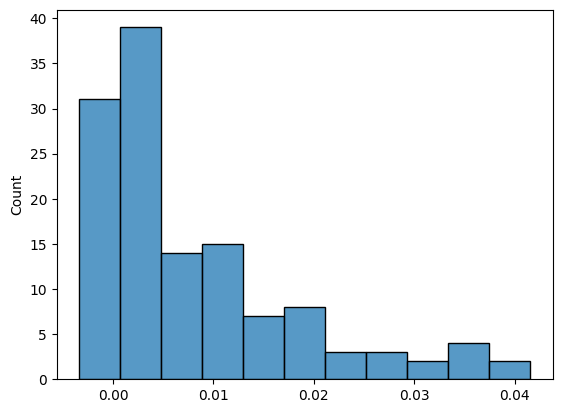

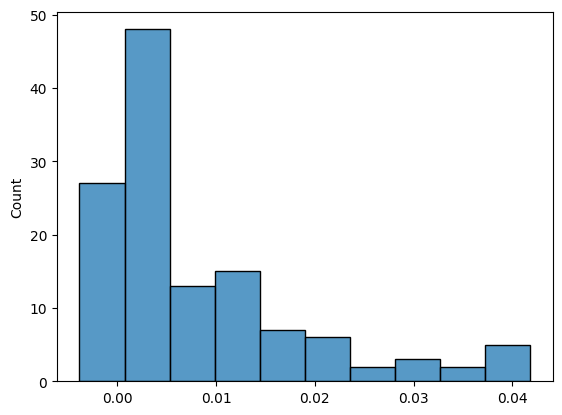

In [28]:
for key, val in r2_oos_dict.items():
    sns.histplot(val)
    plt.show()

(array([47., 35., 10., 16.,  4.,  3.,  3.,  5.,  3.,  2.]),
 array([-0.00199068,  0.00338453,  0.00875974,  0.01413494,  0.01951015,
         0.02488536,  0.03026056,  0.03563577,  0.04101098,  0.04638618,
         0.05176139]),
 <BarContainer object of 10 artists>)

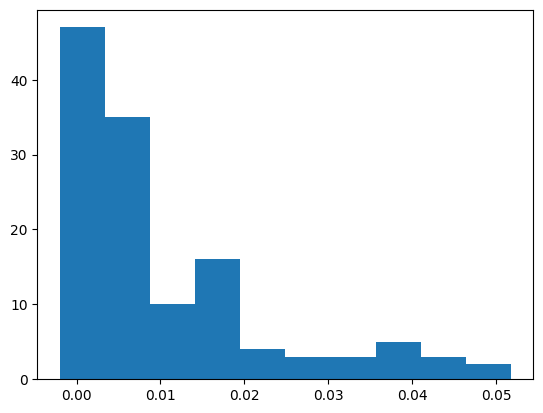

In [7]:
r2_oos = np.load(f"{dataPath}r2_oos_04.28.npy")
plt.hist(r2_oos)